In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 400
import math
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
games = pd.read_csv('/datasets/games.csv', sep=',')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас данные по играм. По предварительному осмотру задач, каждый параметр важен. Начнем предобработку по каждому столбцу по очереди. Сначала преобразуем все столбцы в удобный вид(в нижнем регистре, удобные имена)

In [5]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

у нас есть два пропуска в стоблце name. Необходимо их найти

In [7]:
games[games['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 пустых игры. Удаляем, не повезло им.

In [8]:
games = games[games['name'].isnull() == False]

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Теперь посмотрим, есть ли какие-то неточности в стоблце platform

In [10]:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Половину этих приставок не знаю, но просмотрев их все через поиск, вроде все существуют или существовали.

следующий шаг, просмотреть год и сразу его привести к int

In [11]:
games[games['year_of_release'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Выдумывать года для игр, или парсить реальные года выпуска для них не для этого проекта. Просто удаляем эти игры.

In [12]:
games = games[games['year_of_release'].isnull() == False]

In [13]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
games['year_of_release'] = games['year_of_release'].astype(int)

Переходим к жанрам. Пропусков нет, смотрим на ошибки.

In [15]:
games['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

С жанрам все ок. 

Переходим к продажам

In [16]:
games['na_sales'].describe()

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

In [17]:
games['eu_sales'].describe()

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

In [18]:
games['jp_sales'].describe()

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

In [19]:
games['other_sales'].describe()

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

In [20]:
games['sum_sales'] = (games['eu_sales'] 
                               + games['jp_sales'] + games['na_sales'] 
                               + games['other_sales'])

Очень большой разброс по продажам. Выборка за большой промежуток времени. В японии половина игр продалась с 0 показателями.

Дальше у нас оценки. Во первых, необходимо посмотреть, есть ли у нас заходы за грань оценки.

In [21]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [22]:
games['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

так. у нас тут тип object в оценках. Разберемся что такое tbd. Так tbd это пока не определен. Возможно, еще маленькое значение пользовательских оценок, поэтому несформировалась цифра.

In [23]:
games['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
7.5     249
8.5     247
7.9     246
8.1     237
7.7     236
7.3     232
8.4     221
7       216
7.6     213
7.4     213
8.6     209
6.8     191
8.7     186
7.1     180
8.8     179
7.2     166
8.9     151
6.6     145
6.9     138
6.3     135
6.7     125
6       123
6.5     121
9       119
6.2     112
6.4     105
5.8      97
9.1      89
6.1      82
5.7      77
5.9      76
5.6      72
5.4      71
5.3      70
5.5      69
5        64
5.2      54
4.8      49
5.1      44
9.2      43
4.9      39
4.6      37
4.3      37
4.4      33
4.5      32
9.3      31
4.1      31
4.2      27
4        27
3.8      27
3.5      26
4.7      24
2.8      24
3.4      23
3.1      23
3        21
3.7      19
3.6      18
3.3      15
3.9      13
3.2      12
2.5      12
9.4      11
2.4      11
2        10
2.9       9
2.1       9
1.7       9
2.7       7
2.2       6
9.5       5
1.8       5
1.4       5
2.6       4
1.6       3
1.2       3
0.3       2
0.6       2
1.1 

У нас 2376 оценок "пока не определен" и 6605 пропусков. tbd это теже пропуски по сути. Делаю два датафрейма. Один без пропусков, который будет использоваться для работы с этим столбцом. Второй останется с пропусками в столбцах с рейтингом и оценками. 

In [24]:
games_critic = games[games['critic_score'].isnull() == False]

In [25]:
games_user = games[(games['user_score'].isnull() == False)]

In [26]:
games_user = games_user[games_user['user_score'] != 'tbd']

In [27]:
games_critic.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [28]:
games_critic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7983 entries, 0 to 16705
Data columns (total 12 columns):
name               7983 non-null object
platform           7983 non-null object
year_of_release    7983 non-null int64
genre              7983 non-null object
na_sales           7983 non-null float64
eu_sales           7983 non-null float64
jp_sales           7983 non-null float64
other_sales        7983 non-null float64
critic_score       7983 non-null float64
user_score         7950 non-null object
rating             7902 non-null object
sum_sales          7983 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 810.8+ KB


In [29]:
games_user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [30]:
games_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7463 entries, 0 to 16705
Data columns (total 12 columns):
name               7463 non-null object
platform           7463 non-null object
year_of_release    7463 non-null int64
genre              7463 non-null object
na_sales           7463 non-null float64
eu_sales           7463 non-null float64
jp_sales           7463 non-null float64
other_sales        7463 non-null float64
critic_score       6894 non-null float64
user_score         7463 non-null object
rating             7380 non-null object
sum_sales          7463 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 758.0+ KB


In [31]:
games_user['user_score'] = games_user['user_score'].astype(float)

In [32]:
games_user = games_user.reset_index(drop=True)

In [33]:
games_critic = games_critic.reset_index(drop=True)

In [34]:
games_user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Переходим к рейтингу.

In [35]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

<p style="color:green">Данные предобработали и разобрались с неточностями, отлично, можно приступать и к анализу</p>

Удалять рейтинги, которых мало, но они есть не стоит. В будущем, если они будут мешать, просто сделаем срез без них для выполнения задачи. С предобработкой закончили. Начнем выполнять поставленные нам задачи.

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


In [36]:
games_year = games.groupby('year_of_release')['name'].count().reset_index()

In [37]:
games_year.columns = ['year_of_release', 'count']

In [38]:
games_year

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


 Расцвет появления новых игр начался с 2002 года.  Пик пришелся на 2007-2008 года. Данные за старые периоды для статистики не важны, так как они не дадут ничего полезного, для ситуации в данный момент. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

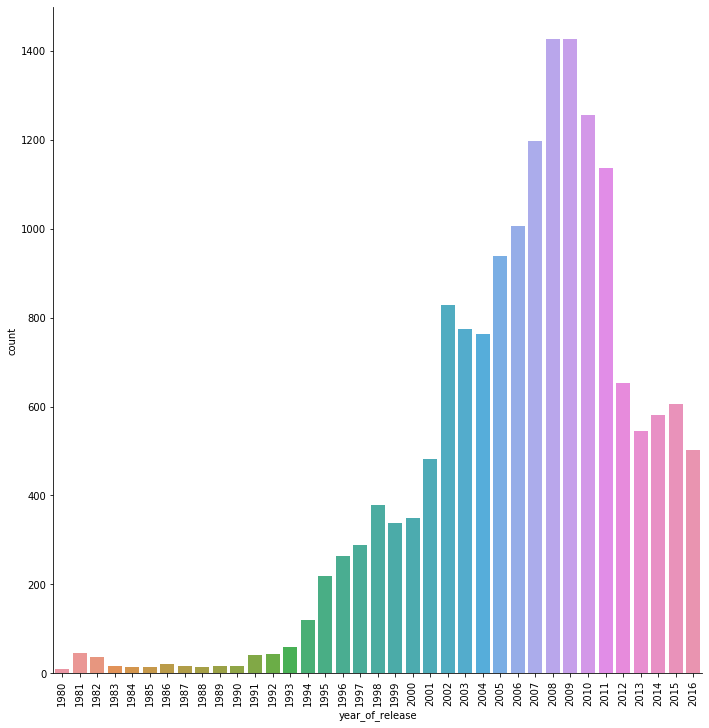

In [39]:
sns.catplot(x="year_of_release", y="count", kind="bar", data=games_year, height=10)
plt.xticks(rotation=90)

перейдем к платформам.

In [40]:
games_platform = games.pivot_table(index=['platform'],values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')

In [41]:
games_platform['sum_sales'] = (games_platform['eu_sales'] 
                               + games_platform['jp_sales'] + games_platform['na_sales'] 
                               + games_platform['other_sales'])

In [42]:
games_platform.sort_values(by='sum_sales', ascending=False).head(10)

,eu_sales,jp_sales,na_sales,other_sales,sum_sales
platform,,,,,
PS2,332.63,137.54,572.92,190.47,1233.56
X360,268.32,12.30,595.74,84.88,961.24
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,486.87,77.71,891.18
DS,188.41,175.02,380.31,59.04,802.78
PS,212.39,139.78,334.72,40.69,727.58
PS4,141.09,15.96,108.74,48.35,314.14
GBA,74.59,46.56,184.12,7.61,312.88
PSP,65.62,75.88,107.27,40.76,289.53


По общим продажам есть 6 топовых платформы. Посмотрим их по годам.

In [43]:
games_ps2 = games.query('platform == "PS2"').reset_index(drop=True)

In [44]:
games_ps2_gr = games_ps2.groupby('year_of_release')['sum_sales'].agg('sum')

In [45]:
games_ps2_gr = games_ps2_gr.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

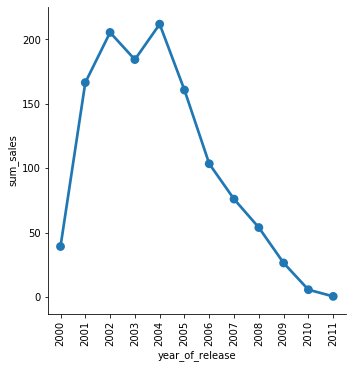

In [46]:
sns.catplot(x="year_of_release", y="sum_sales", kind="point", data=games_ps2_gr, height=5)
plt.xticks(rotation=90)

In [47]:
games_x360 = games.query('platform == "X360"').reset_index(drop=True)

In [48]:
games_x360_gr = games_x360.groupby('year_of_release')['sum_sales'].agg('sum')

In [49]:
games_x360_gr = games_ps2_gr.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

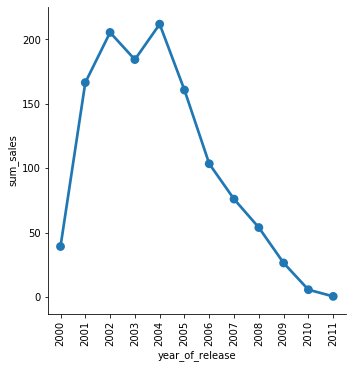

In [50]:
sns.catplot(x="year_of_release", y="sum_sales", kind="point", data=games_x360_gr, height=5)
plt.xticks(rotation=90)

In [51]:
games_ps3 = games.query('platform == "PS3"').reset_index(drop=True)

In [52]:
games_ps3_gr = games_ps3.groupby('year_of_release')['sum_sales'].agg('sum')

In [53]:
games_ps3_gr = games_ps3_gr.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

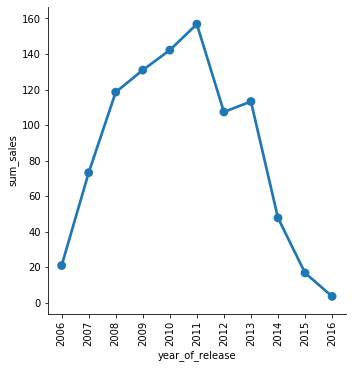

In [54]:
sns.catplot(x="year_of_release", y="sum_sales", kind="point", data=games_ps3_gr, height=5)
plt.xticks(rotation=90)

In [55]:
games_Wii = games.query('platform == "Wii"').reset_index(drop=True)

In [56]:
games_Wii_gr = games_Wii.groupby('year_of_release')['sum_sales'].agg('sum')

In [57]:
games_Wii_gr = games_Wii_gr.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

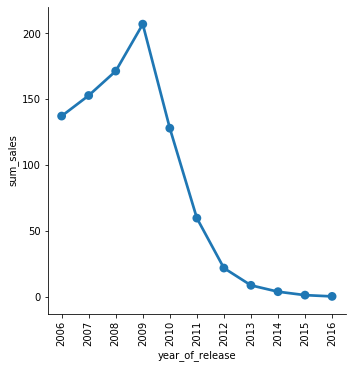

In [58]:
sns.catplot(x="year_of_release", y="sum_sales", kind="point", data=games_Wii_gr, height=5)
plt.xticks(rotation=90)

In [59]:
games_DS = games.query('platform == "DS"').reset_index(drop=True)

In [60]:
games_DS_gr = games_DS.groupby('year_of_release')['sum_sales'].agg('sum')

In [61]:
games_DS_gr = games_DS_gr.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

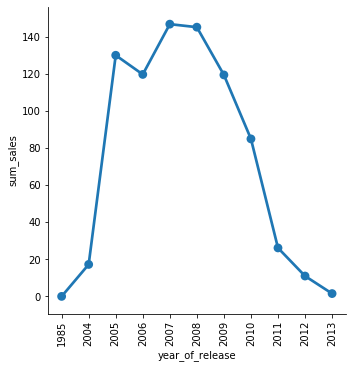

In [62]:
sns.catplot(x="year_of_release", y="sum_sales", kind="point", data=games_DS_gr, height=5)
plt.xticks(rotation=90)

Опа, что это за 1985 год у платформы, которая появилась в 2004 году. Необходимо разобраться.

In [63]:
games[(games['year_of_release'] == 1985) & (games['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Через поиск, нашелся год релиза. 2007. Тут ошибка, исправляем.

In [64]:
games.loc[15957, 'year_of_release'] = 2007

In [65]:
games.loc[15957]

name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                   2007
genre                                           Action
na_sales                                             0
eu_sales                                             0
jp_sales                                          0.02
other_sales                                          0
critic_score                                       NaN
user_score                                         NaN
rating                                             NaN
sum_sales                                         0.02
Name: 15957, dtype: object

Есть.

In [66]:
games_DS = games.query('platform == "DS"').reset_index(drop=True)

In [67]:
games_DS_gr = games_DS.groupby('year_of_release')['sum_sales'].agg('sum')

In [68]:
games_DS_gr = games_DS_gr.reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

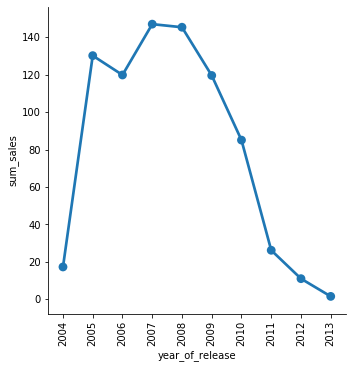

In [69]:
sns.catplot(x="year_of_release", y="sum_sales", kind="point", data=games_DS_gr, height=5)
plt.xticks(rotation=90)

In [70]:
games_ps = games.query('platform == "PS"').reset_index(drop=True)

In [71]:
games_ps_gr = games_ps.groupby('year_of_release')['sum_sales'].agg('sum')

In [72]:
games_ps_gr = games_ps_gr.reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

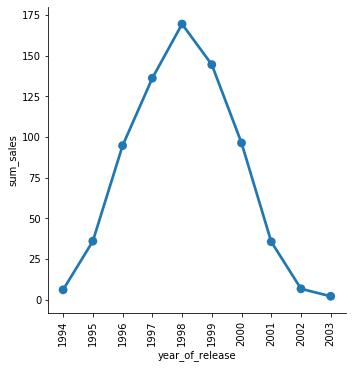

In [73]:
sns.catplot(x="year_of_release", y="sum_sales", kind="point", data=games_ps_gr, height=5)
plt.xticks(rotation=90)

Как мы видим, поведение одинаковое. Начало, расцвет(пик) и закат.

In [74]:
games_platform = games.groupby('platform')['year_of_release'].nunique()

In [75]:
games_platform.reset_index().sort_values(by='year_of_release', ascending=False)

,platform,year_of_release
13,PC,26
5,GB,13
11,NES,12
28,X360,12
19,PSP,12
16,PS2,12
26,Wii,11
17,PS3,11
0,2600,10
23,SNES,10


Как мы можем видеть, самая стабильная платформа это компьютер. Средний срок жизни платформы - 10 лет.


Я считаю, что актуальный период на данный момент с 2012 года. До этого был пик продаж, сейчас он упал. Если мы возьмем в расчет пик, то он будет искажать данные.

In [76]:
games_actual = games.query('year_of_release > 2011').reset_index(drop=True)

In [77]:
games_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [78]:
games_actual_platform = games_actual.groupby(['year_of_release','platform'])['sum_sales'].sum().reset_index()

In [79]:
games_actual_platform

,year_of_release,platform,sum_sales
0,2012,3DS,51.36
1,2012,DS,11.01
2,2012,PC,23.22
3,2012,PS3,107.36
4,2012,PSP,7.69
5,2012,PSV,16.19
6,2012,Wii,21.71
7,2012,WiiU,17.56
8,2012,X360,99.74
9,2013,3DS,56.57


In [80]:
games_actual_xone = games_actual_platform.query('platform == "XOne"')

In [81]:
games_actual_xone['prev'] = games_actual_xone['sum_sales'].shift()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
games_actual_xone['change'] = games_actual_xone['sum_sales'] / games_actual_xone['prev']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
games_actual_xone

,year_of_release,platform,sum_sales,prev,change
19,2013,XOne,18.96,NaN,NaN
29,2014,XOne,54.07,18.96,2.851793
39,2015,XOne,60.14,54.07,1.112262
48,2016,XOne,26.15,60.14,0.434819


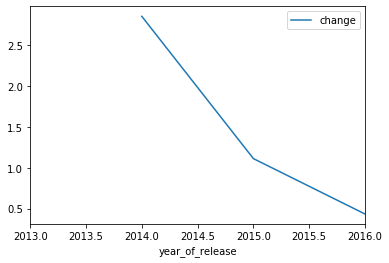

In [84]:
games_actual_xone.plot(y='change', x='year_of_release')

In [85]:
games_actual_platform.query('platform == "PS4"')

,year_of_release,platform,sum_sales
13,2013,PS4,25.99
23,2014,PS4,100.00
33,2015,PS4,118.90
43,2016,PS4,69.25


In [86]:
games_actual_platform.query('platform == "PC"')

,year_of_release,platform,sum_sales
2,2012,PC,23.22
11,2013,PC,12.38
21,2014,PC,13.28
31,2015,PC,8.52
41,2016,PC,5.25


In [87]:
games_actual_games = games_actual[['name', 'platform', 'sum_sales']]

Можем заметить, что продажи на всех платформах упали. В том числе и на трех топовых. Лидирует по продажам PS4.

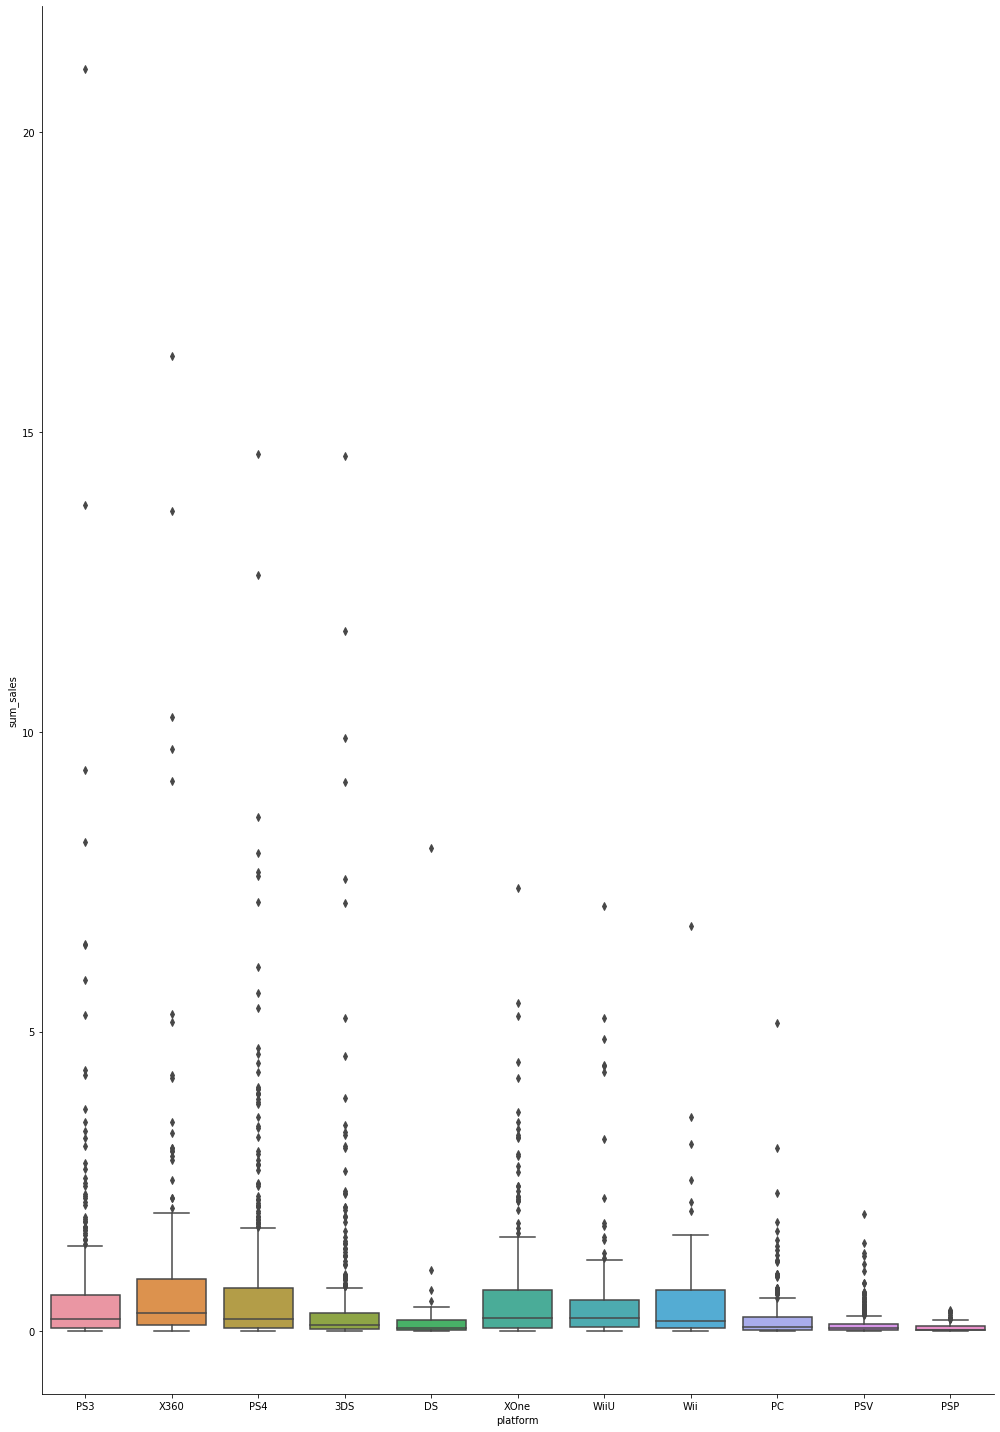

In [88]:
sns.catplot(x="platform", y="sum_sales",
                data=games_actual_games, kind="box",
                height=20, aspect=.7)

Есть супер ааа игры, которые выбиваются наверх очень сильно. Большенство же довольствуется малым. Среднее число на всех платформах очень сильно внизу. Среднее по продажам по платформам примерно в одних значениях.

Теперь, нам наконец то помогут наши games_critic и games_user

In [89]:
games_critic.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [90]:
games_user.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
4,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [91]:
games_critic['platform'].value_counts()

PS2     1275
X360     894
PS3      804
DS       708
XB       706
PC       699
Wii      568
PSP      456
GC       437
GBA      430
PS4      252
PS       196
XOne     169
3DS      166
PSV      119
WiiU      90
DC        14
Name: platform, dtype: int64

In [92]:
games_critic['critic_score'] = games_critic['critic_score'].astype('int')

In [93]:
games_critic_ps2 = games_critic.query('platform == "PS2"')

In [94]:
games_critic_ps2['sum_sales'].describe()

count    1275.000000
mean        0.769827
std         1.376386
min         0.010000
25%         0.140000
50%         0.340000
75%         0.805000
max        20.810000
Name: sum_sales, dtype: float64

In [95]:
games_critic_ps2.corr(method='spearman')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,sum_sales
year_of_release,1.000000,-0.063543,-0.331971,-0.039239,-0.014304,-0.095684,-0.061463
na_sales,-0.063543,1.000000,0.663759,0.172177,0.928917,0.433345,0.939425
eu_sales,-0.331971,0.663759,1.000000,0.162055,0.656127,0.312181,0.695322
jp_sales,-0.039239,0.172177,0.162055,1.000000,0.169968,0.268505,0.368146
other_sales,-0.014304,0.928917,0.656127,0.169968,1.000000,0.424468,0.936324
critic_score,-0.095684,0.433345,0.312181,0.268505,0.424468,1.000000,0.470633
sum_sales,-0.061463,0.939425,0.695322,0.368146,0.936324,0.470633,1.000000


Корреляция спирмана оценок критиков к общим продажам 0.42. Связь конечно есть, но она не очень большая.

In [96]:
games_critic_ps2.query('sum_sales > 3')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
11,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95,9,M,20.81
14,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95,8.7,M,16.15
16,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97
23,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97,8.5,M,13.10
30,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65
56,Final Fantasy X,PS2,2001,Role-Playing,2.91,2.07,2.73,0.33,92,8.7,T,8.04
66,Need for Speed Underground,PS2,2003,Racing,3.27,2.83,0.08,1.02,85,8.6,E,7.20
75,Need for Speed Underground 2,PS2,2004,Racing,2.71,3.02,0.08,1.09,82,8.6,E,6.90
76,Medal of Honor: Frontline,PS2,2002,Shooter,2.93,2.75,0.17,0.99,88,8.5,T,6.84
90,Kingdom Hearts,PS2,2002,Role-Playing,3.64,1.20,1.49,0.07,85,8.8,E,6.40


Эти две игры сильно выбиваются из стаи. Уберем их из графика, чтобы по остальным была более подходящая картина. 

In [97]:
games_critic_ps2 = games_critic_ps2.query('sum_sales < 3')

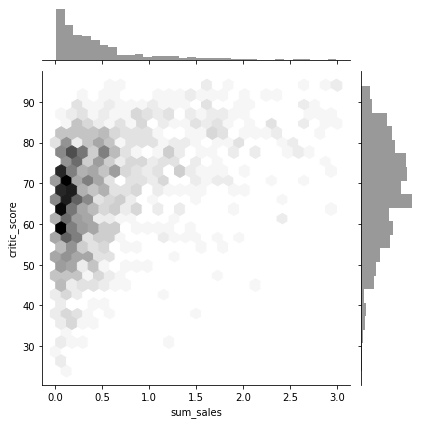

In [98]:
sns.jointplot(x='sum_sales', y='critic_score', kind="hex", color="k", data=games_critic_ps2)

Мы видим, что большинство оценок идет от 60 до 75 баллов. 

In [99]:
games_user['platform'].value_counts()

PS2     1220
X360     945
PS3      861
PC       755
XB       571
Wii      548
DS       512
PSP      418
GC       357
PS4      257
GBA      251
XOne     182
3DS      171
PS       159
PSV      142
WiiU     100
DC        14
Name: platform, dtype: int64

In [100]:
games_user_ps2 = games_user.query('platform == "PS2"')

In [101]:
games_user_ps2['sum_sales'].describe()

count    1220.000000
mean        0.805746
std         1.398955
min         0.010000
25%         0.160000
50%         0.390000
75%         0.862500
max        20.810000
Name: sum_sales, dtype: float64

In [102]:
games_user_ps2.corr(method='spearman')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.089124,-0.377759,-0.060448,-0.018146,-0.111047,-0.067183,-0.092581
na_sales,-0.089124,1.000000,0.621299,0.155949,0.911136,0.419080,0.177377,0.931866
eu_sales,-0.377759,0.621299,1.000000,0.167412,0.602595,0.292423,0.159233,0.662517
jp_sales,-0.060448,0.155949,0.167412,1.000000,0.159985,0.259205,0.220514,0.365784
other_sales,-0.018146,0.911136,0.602595,0.159985,1.000000,0.407440,0.138817,0.926821
critic_score,-0.111047,0.419080,0.292423,0.259205,0.407440,1.000000,0.525645,0.454306
user_score,-0.067183,0.177377,0.159233,0.220514,0.138817,0.525645,1.000000,0.219987
sum_sales,-0.092581,0.931866,0.662517,0.365784,0.926821,0.454306,0.219987,1.000000


Корреляция спирмана оценок пользователей к общим продажам 0.22. Связь почти нет.

In [103]:
games_user_ps2.query('sum_sales > 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
11,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
14,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
16,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97
23,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10
30,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65
56,Final Fantasy X,PS2,2001,Role-Playing,2.91,2.07,2.73,0.33,92.0,8.7,T,8.04
66,Need for Speed Underground,PS2,2003,Racing,3.27,2.83,0.08,1.02,85.0,8.6,E,7.20
75,Need for Speed Underground 2,PS2,2004,Racing,2.71,3.02,0.08,1.09,82.0,8.6,E,6.90
76,Medal of Honor: Frontline,PS2,2002,Shooter,2.93,2.75,0.17,0.99,88.0,8.5,T,6.84
90,Kingdom Hearts,PS2,2002,Role-Playing,3.64,1.20,1.49,0.07,85.0,8.8,E,6.40


Эти две игры сильно выбиваются из стаи. Уберем их из графика, чтобы по остальным была более подходящая картина. 

In [104]:
games_user_ps2 = games_user_ps2.query('sum_sales < 5')

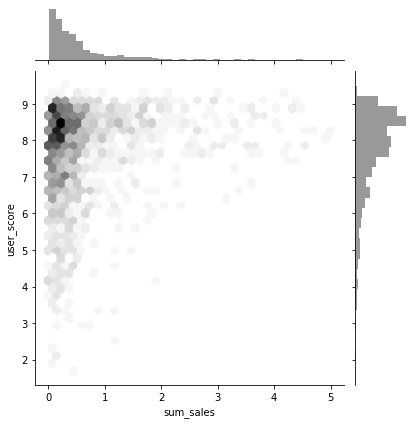

In [105]:
sns.jointplot(x='sum_sales', y='user_score', kind="hex", color="k", data=games_user_ps2)

Самые популярные оценки от 8 до 9 баллов.

In [106]:
games_user_x360 = games_user.query('platform == "X360"')

In [107]:
games_user_x360 = games_user_x360.query('sum_sales < 5')

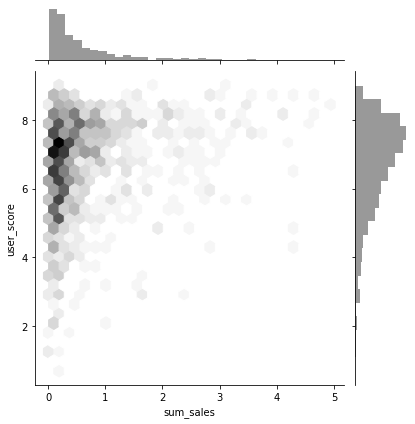

In [108]:
sns.jointplot(x='sum_sales', y='user_score', kind="hex", color="k", data=games_user_x360)

На xbox360 самая популярная оценка 7. Думаю на всех платформах будет варьироваться от 7 до 8 самая популярная оценка.

Переходим к жанрам. Здесь посмотрим за актуальный период.

In [109]:
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [110]:
games_actual['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

С большим отрывом идет жанр action. РПГ и квесты идут на почетных втором и третьем месте.

In [111]:
games_actual_gr_genre = games_actual.groupby('genre')['sum_sales']

In [112]:
games_actual_gr_genre.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,1031.0,0.427856,1.166504,0.01,0.030,0.120,0.3900,21.05
Adventure,302.0,0.097450,0.208237,0.01,0.020,0.030,0.0775,1.66
Fighting,109.0,0.408165,0.910385,0.01,0.060,0.130,0.3600,7.55
Misc,192.0,0.442917,1.081047,0.01,0.030,0.120,0.3375,9.18
Platform,85.0,0.717647,1.364413,0.01,0.090,0.210,0.6600,9.90
Puzzle,28.0,0.174643,0.305438,0.01,0.020,0.045,0.1025,1.19
Racing,115.0,0.465217,0.888664,0.01,0.050,0.140,0.4200,7.09
Role-Playing,370.0,0.521081,1.315937,0.01,0.060,0.140,0.4075,14.60
Shooter,235.0,1.296723,2.251662,0.01,0.135,0.440,1.4800,14.63


Не стал суммировать, так как из-за большое отрыва первого метса, он просто станет самым продаваемым в сумме. Самые 3 топовых по максимольной продаже жанра - action, rpg и shooter. Самое большое среднее по продажам - shooter, Медиана в shooter так же самая большая. Получается, что самым прибыльным жанром становятся шутеры, потом идет action. и потом rpg. Так же есть Sports и Platform.

Самыми низкими  - квесты и пазлы. 

Перейдем к регионам.

In [113]:
games_region_gr = games_actual.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

In [114]:
games_region_gr_na = games_region_gr.sort_values(by='na_sales', ascending=False)

In [115]:
games_region_gr_na['na/jp'] = (games_region_gr_na['na_sales'] / games_region_gr_na['jp_sales']).round(2)

In [116]:
games_region_gr_na['na/eu'] = (games_region_gr_na['na_sales'] / games_region_gr_na['eu_sales']).round(2)

In [117]:
games_region_gr_na.head()

,na_sales,eu_sales,jp_sales,na/jp,na/eu
platform,,,,,
X360,140.05,74.52,1.57,89.20,1.88
PS4,108.74,141.09,15.96,6.81,0.77
PS3,103.38,106.86,35.29,2.93,0.97
XOne,93.12,51.59,0.34,273.88,1.81
3DS,55.31,42.64,87.79,0.63,1.30


Xbox оба поколения более популярны в США, PS в Европе. А 3DS в Японии.

In [118]:
games_genre_pop = games_actual.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

In [119]:
games_genre_pop.sort_values(by=['na_sales'], ascending=False).head()

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,9.23
Sports,81.53,69.09,8.01
Role-Playing,64.00,48.53,65.44
Misc,38.19,26.32,12.86


Самые популярные жанры в США action и шутеры.

In [120]:
games_genre_pop.sort_values(by=['eu_sales'], ascending=False).head()

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Shooter,144.77,113.47,9.23
Sports,81.53,69.09,8.01
Role-Playing,64.00,48.53,65.44
Racing,17.22,27.29,2.50


In [ ]:
fig = plt.figure(figsize=(7,7))

colours = ["aqua", "orange"]

legDist = [pokeLeg['NAME'].count(),pokeNon['NAME'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors=colours,
                 startangle = 45,
                 explode=(0, 0.1))

В европе также.

In [121]:
games_genre_pop.sort_values(by=['jp_sales'], ascending=False).head()

,na_sales,eu_sales,jp_sales
genre,,,
Role-Playing,64.00,48.53,65.44
Action,177.84,159.34,52.80
Misc,38.19,26.32,12.86
Simulation,7.97,14.55,10.41
Fighting,19.79,10.79,9.44


А вот в европе РПГ на первом месте. А шутеров вообще нет в пятерке.

In [122]:
games_actual_rating = games_actual[games_actual['rating'].isnull() == False]

In [123]:
games_actual_rating_gr = games_actual_rating.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

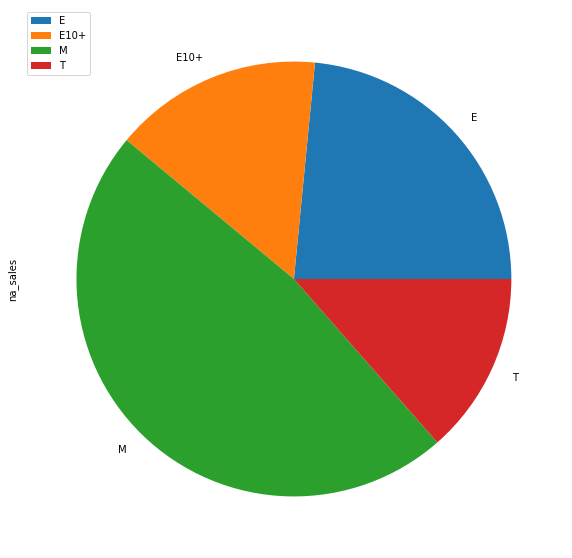

In [125]:
games_actual_rating_gr.plot(kind='pie', y='na_sales', figsize=(10, 10))

In [ ]:
games_atual_rating_gr.plot()

E - everyone

e10+ > 10 лет

T - teen > 13 лет

M - для взрослых > 17 лет

Получается самый популярный жанр в Европе и США M, в Японии E и T



Переходим к следующему этапу

Cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [ ]:
games_actual_user = games_actual[(games_actual['user_score'].isnull() == False)]

In [ ]:
games_actual_user = games_actual_user[games_actual_user['user_score'] != 'tbd']

In [ ]:
games_actual_user['user_score'] = games_actual_user['user_score'].astype('float')

In [ ]:
games_platform_rating_xone = games_actual_user.query('platform == "XOne"')[['name', 'user_score']].reset_index(drop=True)

In [ ]:
games_platform_rating_pc = games_actual_user.query('platform == "PC"')[['name', 'user_score']].reset_index(drop=True)

In [ ]:
results = st.ttest_ind(
    games_platform_rating_xone['user_score'], 
    games_platform_rating_pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)
alpha = .01
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

H0 - средние одинаковые. H1 - средние разные. 
Не получилось отвергнуть. Средние пользовательского рейтинга PC и XOne примерно одинаковые.

In [ ]:
games_genre_sport = games_actual_user.query('genre == "Sports"')[['name', 'user_score']].reset_index(drop=True)

In [ ]:
games_genre_action = games_actual_user.query('genre == "Action"')[['name', 'user_score']].reset_index(drop=True)

In [ ]:
results = st.ttest_ind(
    games_genre_sport['user_score'], 
    games_genre_action['user_score'], equal_var=False)

print('p-значение:', results.pvalue)
alpha = .01
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

H0 - средние одинаковые. H1 - средние разные. 
Отвергаем. Средние пользовательского рейтинга жанров Sports и Action разные.

Использовали scipy.stats.ttest_ind так как у нас две генеральных совокупности, и мы сравниваем их среднее. 

<h2> Общий вывод </h2>

Потенциально популярные жанры для разных рынков различны.
В Европе и США популярны шутеры и action, в Японии РПГ. X360 все еще популярен, но по циклам платформ можно понять, что XOne в следующем году обгонит ее по продажам. PS4 уже обогнала PS3. Значит стоит сосредоточиться на этих двух консолях.

Рынок сейчас падает. Пик 2008-2009 годов ушел. В США и Европе необходимо сосредоточиться на играх рейтинга M, когда как в Японии E и T. 

По продажам заметно лидирует США и регион NA. Следующим идет Европа. Япония отдельный рынок. Статистика по платформам и жанрам тут другая. Для США Xbox платформы предпочтительнее, для Европы - PS, Для Японии Nintendo
